In [86]:
import pandas as pd

In [87]:
df = pd.read_csv('outputs/final_output_2.csv')

In [88]:
df.dtypes

class           int64
image_path     object
name           object
xmax          float64
xmin          float64
ymax          float64
ymin          float64
dtype: object

In [89]:
df.xmax = df.xmax /2 
df.ymax = df.ymax / 2
df.xmin = df.xmin / 2 
df.ymin = df.ymin / 2

In [56]:
# df.xmax = df.xmax.astype(int)
# df.ymax = df.ymax.astype(int)
# df.xmin = df.xmin.astype(int)
# df.ymin = df.ymin.astype(int)

In [57]:
new = pd.DataFrame()
for image in df.image_path.unique():
    tmp = df[(df.image_path == image)]
    pot = tmp[tmp['class']== 9]
    if len(pot) >= 3:
        pot = pot.sample(3)
        tmp = tmp[tmp['class'] != 2]
        tmp = pd.concat([tmp, pot])
    new = pd.concat([new, tmp])
    
    

In [58]:
#new = df.copy()
new = new[['class','image_path','name','xmax','xmin','ymax','ymin']]
new.to_csv('new.csv', index=False)

In [8]:
tmp

,class,image_path,name,xmax,xmin,ymax,ymin
6878,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,960.0,762.5,319.5,193.5
6879,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,846.0,587.0,315.5,206.5
6880,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,664.0,164.5,326.0,202.0
6881,3,984841724143c66506986b3faa50e4b9.jpg,GARBAGE,299.5,229.0,295.0,233.5
6882,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,319.0,0.0,335.0,204.0
6879,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,846.0,587.0,315.5,206.5
6880,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,664.0,164.5,326.0,202.0
6878,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,960.0,762.5,319.5,193.5


In [9]:
new

,class,image_path,name,xmax,xmin,ymax,ymin
0,3,8aa9b7f07715e15490f5466c6d36e53b.jpg,GARBAGE,113.5,0.0,324.5,153.0
1,3,8aa9b7f07715e15490f5466c6d36e53b.jpg,GARBAGE,497.0,447.5,521.5,477.0
2,3,8aa9b7f07715e15490f5466c6d36e53b.jpg,GARBAGE,193.5,0.0,361.0,135.0
3,3,8aa9b7f07715e15490f5466c6d36e53b.jpg,GARBAGE,110.0,0.0,402.0,210.5
4,3,8aa9b7f07715e15490f5466c6d36e53b.jpg,GARBAGE,959.5,929.0,315.5,234.5
...,...,...,...,...,...,...,...
6881,3,984841724143c66506986b3faa50e4b9.jpg,GARBAGE,299.5,229.0,295.0,233.5
6882,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,319.0,0.0,335.0,204.0
6879,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,846.0,587.0,315.5,206.5
6880,9,984841724143c66506986b3faa50e4b9.jpg,CLUTTER_SIDEWALK,664.0,164.5,326.0,202.0


In [413]:
test_dir = './dataset/test/images'

In [513]:
def object_detection(df=df, path=test_dir, change_width=False, image_path=False):
    
    if image_path != False:
        select_df = df[df.image_path == image_path].reset_index()
    else:
        df = df.sample(frac=1)
        image_path = df.iloc[0].image_path
        select_df = df[df.image_path == image_path].reset_index()
        
    print(image_path)
    image = cv2.cvtColor(cv2.imread(os.path.join(path, image_path)), cv2.COLOR_BGR2RGB)
    for i in select_df.index:
        xmin = select_df.iloc[i].xmin #* 2
        ymin = select_df.iloc[i].ymin #* 2
        xmax = select_df.iloc[i].xmax #* 2
        ymax = select_df.iloc[i].ymax #* 2
        label = select_df.iloc[i]['name']
        
        height = image.shape[0]
        width = image.shape[1]
        if change_width == True:
            width = 960
            height = 540
            image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
#             xmax = xmax / 2
#             xmin = xmin / 2

        print('class:' , select_df.iloc[i]['name'])
        print('xmin:' , xmin)
        print('ymin:' , ymin)
        print('xmax:' , xmax)
        print('ymax:' , ymax)
        print('conf:' , select_df.iloc[i]['confidence'])
        print('----------------------------')
            
        cv2.rectangle(image,
                      (int(xmin) , int(ymin) ),
                      (int(xmax) , int(ymax) ),
                      (0,255,0), thickness=2)

        ((label_width, label_height), _) = cv2.getTextSize(label, fontFace=cv2.FONT_HERSHEY_PLAIN, 
        fontScale=1.75, thickness=2)

        cv2.rectangle(
      image,
      (int(xmin) , int(ymin)),
      (int(xmin + label_width + label_width * 0.05), int(ymin + label_height + label_height * 0.25)),
      color=(255, 0, 0),
      thickness=cv2.FILLED
    )

        cv2.putText(
      image,
      label,
      org=(int(xmin), int(ymin + label_height + label_height * 0.25)), 
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2 )

    plt.imshow(image)

            


In [451]:
def remove_overlap(df):
    output = pd.DataFrame()
    for image in df.image_path.unique():
        check = df[df.image_path == image].sort_values(by='xmax', ascending=False)
        check = check.reset_index()
        del check['index']
        
#         display(check)
        
        res = []
        for i in check.index:
            j = i + 1
            if j < len(check):
                c_xmin = check.iloc[i].xmin
                p_xmax = check.iloc[j].xmax
                
                if (c_xmin > p_xmax) and (check.iloc[i]['class'] == check.iloc[j]['class']):
                    res.append(1)
                else:
                    res.append(0)
        res.append(1)
#         print(res)
        
        check['keep'] = res
        
        output = pd.concat([output, check[check.keep == 1]])
    return output
        

In [60]:
df = remove_overlap(df)

In [61]:
df.shape

(4148, 8)

In [62]:
df = df[['class','image_path','name','xmax','xmin','ymax','ymin']]
df.to_csv('df.csv', index=False)

In [529]:


#df = pd.read_csv('outputs/results_conf.csv')
df = pd.read_csv('outputs/val_final_conf.csv')
df.shape

df.xmax = df.xmax /2 
df.ymax = df.ymax / 2
df.xmin = df.xmin / 2 
df.ymin = df.ymin / 2

# df = df[['class','image_path','name','xmax','xmin','ymax','ymin']]
# df.to_csv('odd.csv', index=False)


# keep = []
# for i in df.index:
#     if (df.iloc[i]['class'] == 2 and df.iloc[i].ymin < 500) or (df.iloc[i]['class'] == 3 and df.iloc[i].ymin < 500):
#         keep.append(0)
#     else:
#         keep.append(1)


# df['keep'] = keep
# new_df = df[df.keep == 1]
        
    


per = df[df.confidence >= 0.5]



non = df[~df.image_path.isin(per.image_path.unique())]

non.image_path.nunique()

non = non.sort_values(by=['image_path', 'confidence'], ascending=False)
#non = non.drop_duplicates('image_path', keep='first')


# non.xmin = None
# non.ymin = None
# non.xmax = None
# non.ymax = None
# non['class'] = None
# non['name'] = None


non = non.reset_index()

o =pd.concat([per,non])

o = o[['class','image_path','name','xmax','xmin','ymax','ymin']]
o.to_csv('o.csv', index=False)


In [491]:
o.image_path.nunique()

2092

In [532]:
o.shape

(5236, 7)

In [525]:
non

,index,xmin,ymin,xmax,ymax,confidence,class,name,image_path
0,9444,None,None,None,None,0.147478,None,None,ff70d044ebc529c4664193f29a1981d6.jpg
1,2014,None,None,None,None,0.268347,None,None,fe4aa65fe506e2f73e9fdd096166c5c7.jpg
2,548,None,None,None,None,0.290222,None,None,fde045a36a5fa56a3fdb5d12c34d5705.jpg
3,7966,None,None,None,None,0.126687,None,None,fc13cf0c55532192e049aaca6cb386d6.jpg
4,7482,None,None,None,None,0.303722,None,None,fb96ea9e80248aadc632a18a27876491.jpg
...,...,...,...,...,...,...,...,...,...
262,4405,None,None,None,None,0.028710,None,None,030a78514521188500fa24de227b33f0.jpg
263,2524,None,None,None,None,0.237135,None,None,027a4ea75b44bb19e5462d550af31565.jpg
264,2646,None,None,None,None,0.034863,None,None,02710df871b98a873d401e304cdfd48b.jpg
265,4695,None,None,None,None,0.379261,None,None,01f2b5e3bb064105b43f5e32c40870c7.jpg


5b8120d69607a077b7583334be3ba18b.jpg
class: POTHOLES
xmin: 505.0
ymin: 330.0
xmax: 756.5
ymax: 527.5
conf: 0.5962372422218323
----------------------------
class: POTHOLES
xmin: 216.5
ymin: 344.5
xmax: 390.5
ymax: 528.0
conf: 0.4576855003833771
----------------------------
class: POTHOLES
xmin: 492.0
ymin: 286.0
xmax: 652.0
ymax: 401.5
conf: 0.4244715273380279
----------------------------
class: POTHOLES
xmin: 391.5
ymin: 303.5
xmax: 546.0
ymax: 383.0
conf: 0.2374972999095916
----------------------------
class: POTHOLES
xmin: 618.0
ymin: 277.0
xmax: 790.5
ymax: 395.5
conf: 0.1707793921232223
----------------------------
class: POTHOLES
xmin: 493.5
ymin: 199.0
xmax: 562.5
ymax: 255.0
conf: 0.1288704127073288
----------------------------
class: POTHOLES
xmin: 301.5
ymin: 288.5
xmax: 433.5
ymax: 379.5
conf: 0.0992961749434471
----------------------------
class: CONSTRUCTION_ROAD
xmin: 486.0
ymin: 292.5
xmax: 648.0
ymax: 400.0
conf: 0.0806581526994705
----------------------------
class: GAR

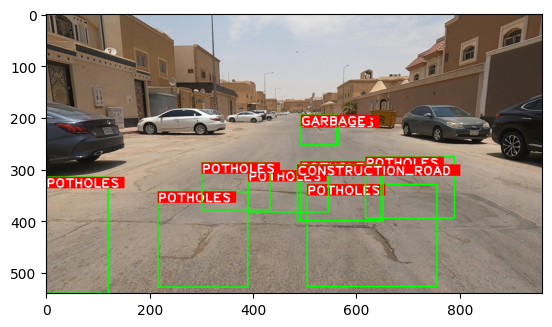

In [630]:
object_detection(df=df,  image_path = '5b8120d69607a077b7583334be3ba18b.jpg', change_width=True)

In [398]:
df = pd.read_csv('outputs/results_conf.csv')
df.xmax = df.xmax /2 
df.ymax = df.ymax / 2
df.xmin = df.xmin / 2 
df.ymin = df.ymin / 2

In [399]:
avg_conf = pd.DataFrame()
for c in df['class'].unique():
    _mean = 0.8#df[df['class'] == c].describe(include='all').loc['mean'].confidence
    avg_conf = pd.concat([avg_conf, df[ ( df['class'] == c) & ( df.confidence >= _mean )]])
#avg_conf = remove_overlap(avg_conf)   

In [400]:
low_conf = pd.DataFrame()
_low_conf = df[~df.image_path.isin(avg_conf.image_path.unique())]
for image in _low_conf.image_path:
    highest_score = _low_conf[_low_conf.image_path == image].sort_values(by='confidence', ascending=False).head(2)
    low_conf = pd.concat([low_conf,highest_score ])
low_conf = remove_overlap(low_conf)    

In [401]:
res = pd.concat([low_conf, avg_conf])

In [403]:
res = res[['class','image_path','name','xmax','xmin','ymax','ymin']]
res.to_csv('res.csv', index=False)

In [465]:
df = pd.read_csv('outputs/----results_conf.csv')
df[df.confidence>0.0]

,xmin,ymin,xmax,ymax,confidence,class,name,image_path
0,759.899048,497.432648,870.301025,589.814209,0.617034,3,GARBAGE,953ab1447c46ecfef67ab14629cd70c7.jpg
1,564.392273,510.925537,661.059082,588.191895,0.295683,3,GARBAGE,953ab1447c46ecfef67ab14629cd70c7.jpg
2,1220.331299,349.146820,1411.919922,446.859039,0.231110,7,BAD_BILLBOARD,953ab1447c46ecfef67ab14629cd70c7.jpg
3,801.736816,519.768188,897.775818,600.070190,0.118525,3,GARBAGE,953ab1447c46ecfef67ab14629cd70c7.jpg
4,765.763794,549.136047,898.101990,651.883545,0.020234,3,GARBAGE,953ab1447c46ecfef67ab14629cd70c7.jpg
...,...,...,...,...,...,...,...,...
23215,1844.797485,441.605438,1919.348145,567.942871,0.035458,3,GARBAGE,984841724143c66506986b3faa50e4b9.jpg
23216,0.000000,427.014404,256.938171,663.978333,0.032883,9,CLUTTER_SIDEWALK,984841724143c66506986b3faa50e4b9.jpg
23217,0.000000,444.731537,119.290268,636.027222,0.031093,9,CLUTTER_SIDEWALK,984841724143c66506986b3faa50e4b9.jpg
23218,203.134293,400.339874,965.971497,661.433228,0.017911,3,GARBAGE,984841724143c66506986b3faa50e4b9.jpg


In [466]:
df.shape

(23220, 8)

In [666]:
df = pd.read_csv('outputs/val_final_conf.csv')
#df = pd.read_csv('outputs/----results_conf.csv')
df.shape

df.xmax = df.xmax /2 
df.ymax = df.ymax / 2
df.xmin = df.xmin / 2 
df.ymin = df.ymin / 2


In [667]:
out = pd.DataFrame()
th = 0.43
per = 0.7

low_conf = df[ ( (df['class'] == 0) & (df.confidence < 0.33)    ) 
           |    ( (df['class'] == 2) & (df.confidence < 0.33)    ) 
          | ((df['class'] == 3) & (df.confidence < 0.33)    )]

df_h = df[~df.index.isin(low_conf.index.unique())]



for image in df_h.image_path.unique():
    select = df_h[df_h.image_path == image]#.sort_values(by='confidence', ascending=False)
    high_conf = select[select.confidence >= th]
    low_conf = select[select.confidence < th].sort_values(by='confidence', ascending=False).reset_index()
    per_low = int(len(low_conf) * per)
    if per_low < 1:
        per_low = 1
    low_conf = low_conf.head(per_low)
    out = pd.concat([out, pd.concat([low_conf, high_conf])])
    
not_predict = df[~df.image_path.isin(out.image_path.unique())].sort_values(by='confidence', ascending=False)
not_predict = not_predict.drop_duplicates('image_path', keep='first')

out = pd.concat([out, not_predict])
    
    

In [668]:
out.shape

(4717, 9)

In [669]:
out = out[['class','image_path','name','xmax','xmin','ymax','ymin']]
out.to_csv('out.csv', index=False)